# Szívroham kockázatának elemzése

## Készítette: Borszéki Dániel
### 2025. 05. 15


Magyarországon évente 20-25 ezer ember kap szívinfarktus, ez óránként több mint 2 ember.
Fontos, hogy tisztában legyünk a statisztikával, mert közelebbi hozzátartozónkat és akár minket is érinthetnek a szív és érrendszeri megbetegedések.


## Programcsomagok telepítése, betöltése

In [13]:
!pip install pandas; seaborn; matplotlib

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Adatok betöltése, első néhány sor megjelenítése

In [25]:
df = pd.read_csv("data/Medicaldataset.csv")
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


## Alap statisztikai jellemzők

### Alapinformációk

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


### Statisztikai összegzés

In [27]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


## Hiányzó értékek és adatminőség ellenőrzése

In [28]:
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

# Vizualizációk

## Életkor szerinti eloszlás

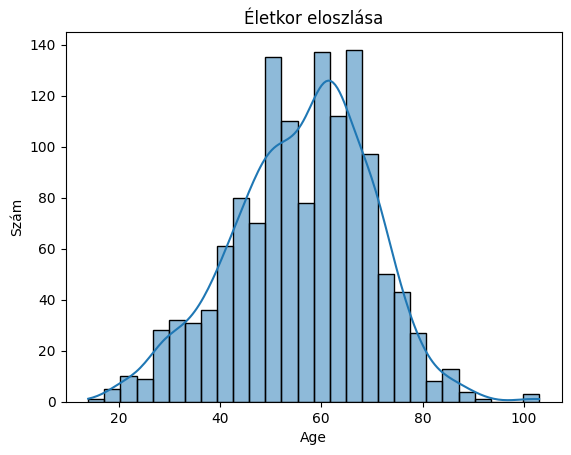

In [35]:
sns.histplot(df["Age"], kde=True)
plt.ylabel("Szám")
plt.xlabel("Kor")
plt.title("Életkor eloszlása")
plt.show()

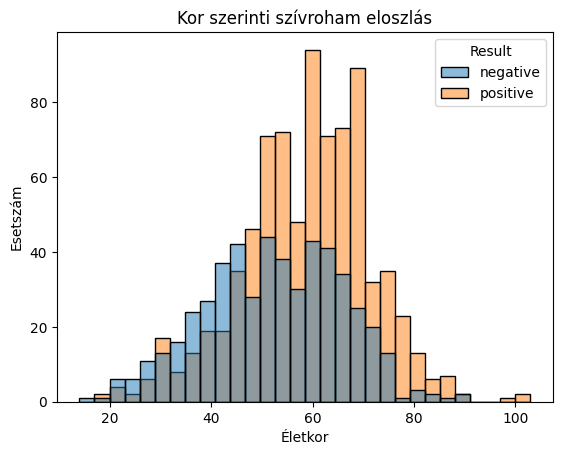

In [30]:
sns.histplot(data=df, x="Age", hue="Result", bins=30)
plt.title("Kor szerinti szívroham eloszlás")
plt.xlabel("Életkor")
plt.ylabel("Esetszám")
plt.show()

## Nem szerinti eloszlás

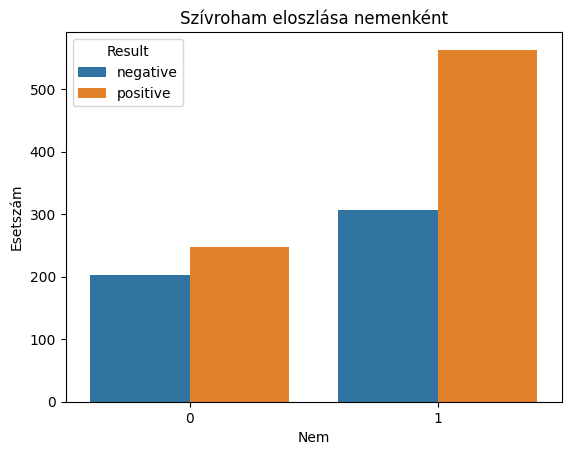

In [31]:
sns.countplot(x='Gender', hue='Result', data=df)
plt.title("Szívroham eloszlása nemenként")
plt.xlabel("Nem")
plt.ylabel("Esetszám")
plt.show()

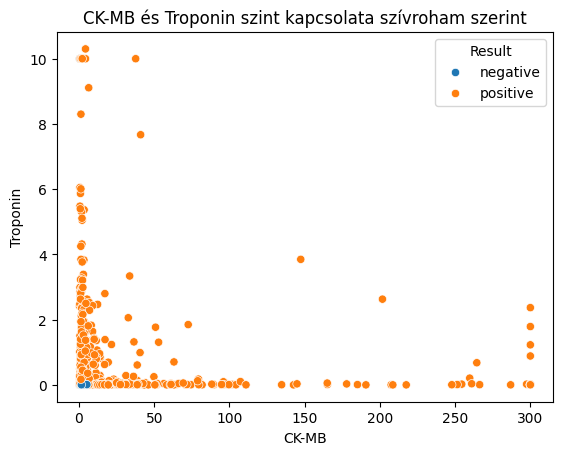

In [32]:
sns.scatterplot(data=df, x='CK-MB', y='Troponin', hue='Result')

plt.title('CK-MB és Troponin szint kapcsolata szívroham szerint')
plt.show()


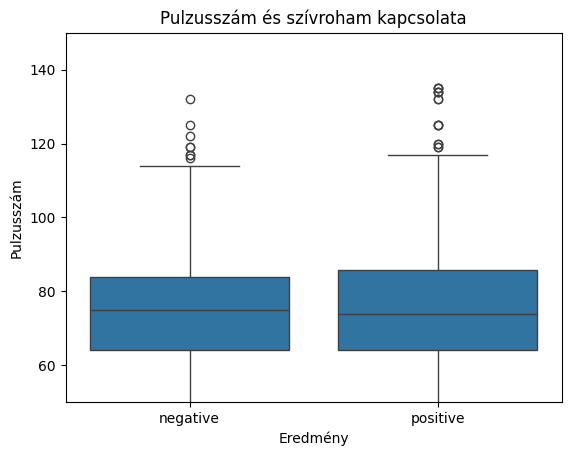

In [36]:
sns.boxplot(x='Result', y='Heart rate', data=df)
plt.xlabel("Eredmény")
plt.ylabel("Pulzusszám")
plt.ylim(50, 150)  # csak a lényeges tartományt
plt.title('Pulzusszám és szívroham kapcsolata')
plt.show()

## Hőkép

### 1 - Erős pozítív kapcsolat
### 0 - Nincs kapcsolat
### -1 - Erős negatív kapcsolat


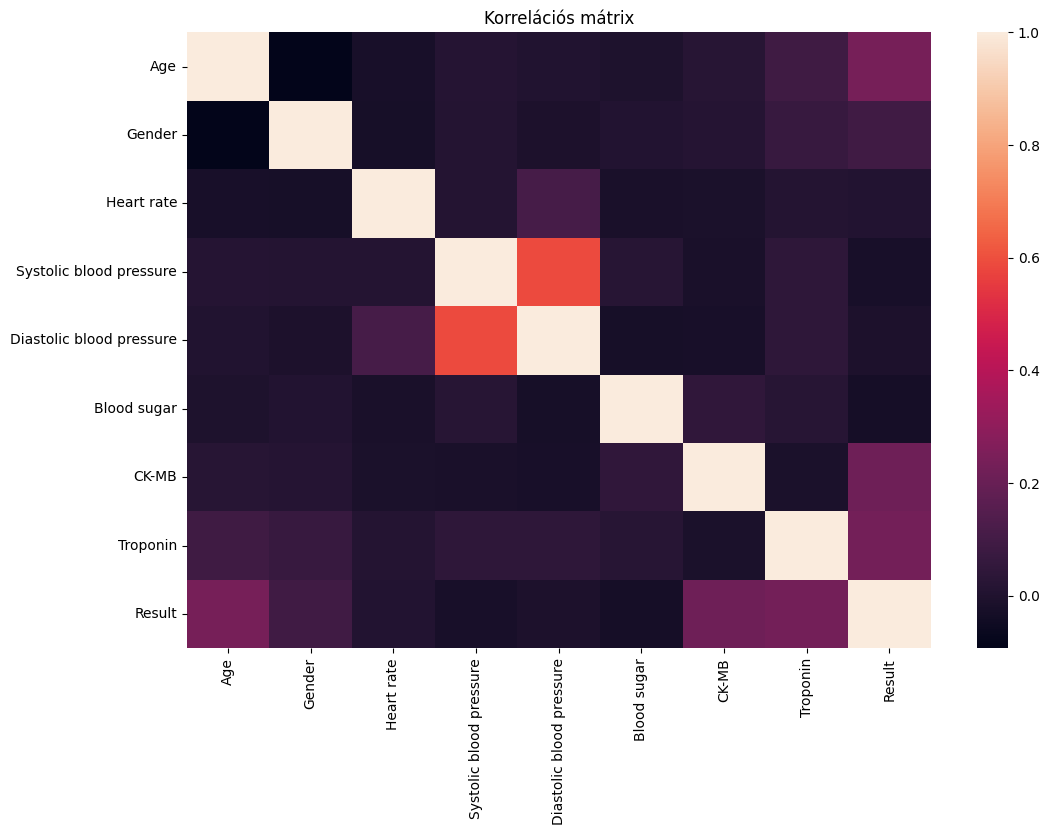

In [23]:
plt.figure(figsize=(12,8))
df["Result"] = df["Result"].map({"negative": -1, "positive": 1})
corr = df.corr()
sns.heatmap(corr)
plt.title("Korrelációs mátrix")
plt.show()


# Észrevételek és következtetések

## Életkorra vonatkozóan
* A szívroham gyakrabban fordul elő idősebb pácienseknél. Az életkor előrehaladtával nő a kockázat.

## Nemre vonatkozóan
* A férfiak körében gyakrabban forful elő szívroham, mint nőknél.

## Troponin és CK-MB
* A szívrohamot szenvedett pácienseknél jelentősen magasabb volt a troponin és CK-MB szint.

## Pulzusszámra vonatkozóan
* A szívrohamon átesett páciensek pulzusszáma átlagosan magasabb volt, mint a szívroham nélküli csoporté. Ez arra utalhat, hogy a megemelkedett pulzus potenciálisan előre jelezheti a szívroham kockázatát.



# Konklúzió
**Az elemzés során több tényező is meg lett vizsgálva, amelyek befolyásolhatják a szívroham kialakulását. Az adatok alapján a következő következtetések vonhatók le:**

* Pulzusszám: A szívrohamot átélt személyeknél általában magasabb pulzusszám figyelhető meg, ami a szív túlterhelésére utalhat.
* Troponin és CK-MB: Mindkét enzim szintje magasabb a szívrohamot átélt pácienseknél, ami összhangban van az orvosi diagnosztikai gyakorlatokkal.
* Nemek közötti különbség: A férfiak körében gyakoribb volt a szívroham, ami megfelel az epidemiológiai megfigyeléseknek.
* Összességében az adatok jól mutatják, hogy a szívroham több tényező együttes hatására alakul ki, és ezek az eltérések már alapvető statisztikai vizsgálatokkal is jól azonosíthatók.

